In [1]:
from torch.utils.data import Dataset
import os
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import statistics
import matplotlib.pyplot as plt

In [2]:
path = "./Mazda_1400/"
data_path = os.path.join(path, "data")
datasets_list = os.listdir(data_path)
datasets_list.sort()

input_data = []
output_data = []
output_data_all = []
output_data_max = []
output_data_min = []
output_data_median = []
output_data_mean = []
output_data_std = []

for i_dt, dt in enumerate(datasets_list):
    # input data
    #print("%03i / %03i - loading %s"%(i_dt+1,len(datasets_list),dt))    
    # output data
    out = pd.read_csv(os.path.join(data_path, dt, "thermo1deg.out"), delimiter="\t", names=["deg", "out"], na_values="?")
    #print(out.shape)
    output_data.append(out["out"])
    output_data_all.extend(out["out"])
    output_data_max.append(out["out"].max())
    output_data_min.append(out["out"].min())
    output_data_median.append(out["out"].median())
    output_data_mean.append(out["out"].mean())
    output_data_std.append(out["out"].std())
    
    
    #inp = np.load(os.path.join(data_path, dt, dt + "_2.npy"))
    #print(inp.shape)
    #input_data.append(inp)

#print(input_data[0][5][9][5])
#print(len(input_data))
#print(input_data[0].shape)

#print(output_data[0][45:65])
#print(len(output_data))
print(output_data[0].shape)


(101,)


In [3]:
print(len(output_data_max))
print(min(output_data_max))
print(max(output_data_max))
print(statistics.mean(output_data_max))
print(statistics.median(output_data_max))

1400
0.009231371442035
481.7626545825015
23.471561891986855
9.854032655565868


[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
[701. 220. 138.  92.  58.  47.  40.  19.  21.  12.  12.   7.   4.   4.
   3.   3.   2.   2.   2.]


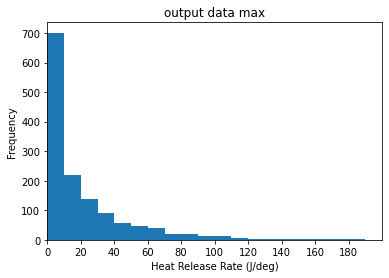

In [4]:
n, bins, patches=plt.hist(output_data_max,bins=np.arange(0, 200, 10))
print(bins)
print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("output data max")
plt.xticks(np.arange(0, 200, 20))
plt.xlim(0,200) 
plt.savefig('data_max.png' ) 
plt.show()

In [5]:
print(len(output_data_min))
print(min(output_data_min))
print(max(output_data_min))
print(statistics.mean(output_data_min))
print(statistics.median(output_data_min))


1400
-7.638524634256875
0.0
-0.053403902583211774
-3.277677077687439e-10


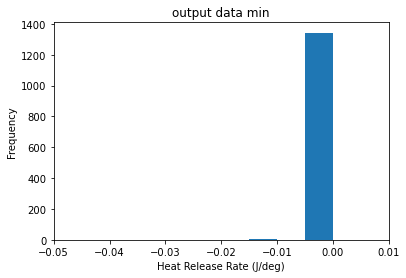

In [6]:
n, bins, patches=plt.hist(output_data_min,bins=np.arange(-1,1,0.005))
#print(bins)
#print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("output data min")
plt.xticks(np.arange(-1, 1,0.01))
plt.xlim(-0.05,0.01) 

plt.savefig('data_min.png') 
plt.show()

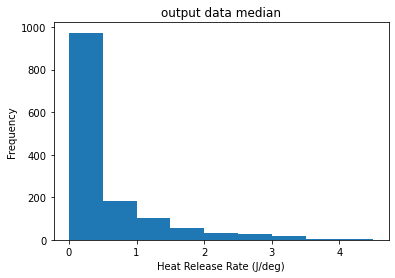

In [7]:
n, bins, patches=plt.hist(output_data_median,bins=np.arange(0,5,0.5))
#print(bins)
#print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("output data median")
#plt.xticks(np.arange(-1, 1,0.01))
#plt.xlim(-0.05,0.01) 

plt.savefig('data_median.png') 
plt.show()

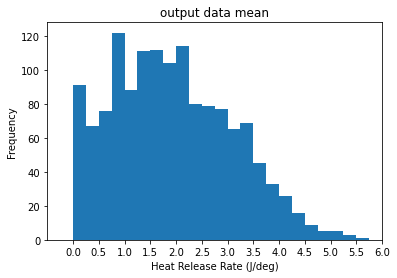

In [8]:
n, bins, patches=plt.hist(output_data_mean,bins=np.arange(-1,6,0.25))
#print(bins)
#print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("output data mean")
plt.xticks(np.arange(0, 6.5, 0.5))
plt.xlim(-0.5,6) 

plt.savefig('data_mean.png') 
plt.show()

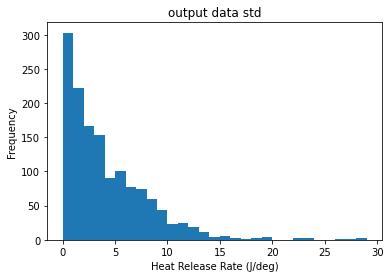

In [9]:
n, bins, patches=plt.hist(output_data_std,bins=np.arange(0,30,1))
#print(bins)
#print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("output data std")
#plt.xticks(np.arange(0, 30, 10))
#plt.xlim(0,30) 

plt.savefig('data_std.png') 
plt.show()

In [10]:
print(len(output_data_all))
print(min(output_data_all))
print(max(output_data_all))

print("median:", statistics.median(output_data_all))
print("mean:", statistics.mean(output_data_all))
print("std:", statistics.stdev(output_data_all))

141400
-7.638524634256875
481.7626545825015
median: 0.183709849159153
mean: 1.9316095176981256
std: 5.988327026596383


In [11]:
minus = [i for i in output_data_all if i < -1]
print(statistics.mean(minus))
#print(minus)
print("output_data < -1:", sum(x < -1 for x in output_data_all))
print("-1 <= output_data < 0:", sum( ((-1 <= x) and (x < 0)) for x in output_data_all))

print("output_data < -0.0000001:", sum(x < -0.0000001 for x in output_data_all))
print("-0.0000001 <= output_data < 0:", sum( ((-0.0000001 <= x) and (x < 0)) for x in output_data_all))
print("output_data < 0:", sum(x < 0 for x in output_data_all))
print("0 <= output_data:", sum(0 <= x for x in output_data_all))
print("0 <= output_data < 100:", sum( ((0 <= x) and (x < 100)) for x in output_data_all))
print("100 <= output_data:", sum(100 <= x for x in output_data_all))

print("0 <= output_data < 50:", sum( ((0 <= x) and (x < 50)) for x in output_data_all))
print("50 <= output_data:", sum(50 <= x for x in output_data_all))

print("0 <= output_data < 200:", sum( ((0 <= x) and (x < 200)) for x in output_data_all))
print("200 <= output_data:", sum(200 <= x for x in output_data_all))


-2.2959132555473225
output_data < -1: 34
-1 <= output_data < 0: 12389
output_data < -0.0000001: 84
-0.0000001 <= output_data < 0: 12339
output_data < 0: 12423
0 <= output_data: 128977
0 <= output_data < 100: 128925
100 <= output_data: 52
0 <= output_data < 50: 128723
50 <= output_data: 254
0 <= output_data < 200: 128966
200 <= output_data: 11


[-0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5
  0.55  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95]
[12347. 42975.  7733.  4974.  3752.  3157.  2895.  2675.  2560.  2248.
  2239.  1962.  1677.  1673.  1402.  1247.  1265.  1084.  1062.   981.]


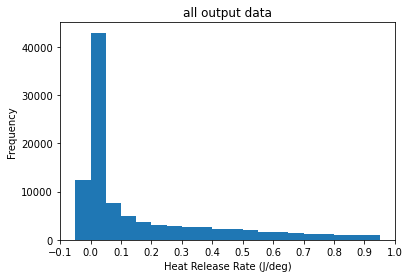

In [12]:
n, bins, patches=plt.hist(output_data_all,bins=np.arange(-0.05, 1, 0.05))
print(bins)
print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("all output data")
plt.xticks(np.arange(-0.1, 1.1, 0.1))
plt.xlim(-0.1,1) 
plt.savefig('all_data_small.png') 
plt.show()

[-10  -5   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75
  80  85  90  95]
[2.00000e+00 1.24210e+04 1.14523e+05 7.93200e+03 2.89800e+03 1.42700e+03
 8.25000e+02 4.99000e+02 2.56000e+02 1.85000e+02 9.70000e+01 8.10000e+01
 5.20000e+01 3.90000e+01 3.10000e+01 2.20000e+01 1.40000e+01 1.00000e+01
 8.00000e+00 1.30000e+01 4.00000e+00]


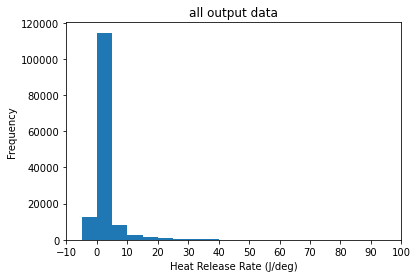

In [13]:
n, bins, patches=plt.hist(output_data_all,bins=np.arange(-10, 100, 5))
print(bins)
print(n)
plt.xlabel("Heat Release Rate (J/deg)")
plt.ylabel("Frequency")
plt.title("all output data")
plt.xticks(np.arange(-10, 110, 10))
plt.xlim(-10,100) 
plt.savefig('all_data.png') 
plt.show()

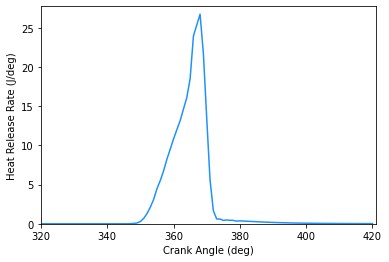

In [15]:
x = np.arange(320, 421, 1) 

plt.figure()

#plt.plot(x, output_data[5], color='dodgerblue', label = 'gt')
plt.plot(x, output_data[1064], color='dodgerblue')

plt.xlabel('Crank Angle (deg)')
plt.ylabel('Heat Release Rate (J/deg)')

plt.xlim(320, 421)
plt.ylim(-0.005, output_data[1064].max()+1)

plt.savefig("output_ex.png") 

plt.show()

plt.clf()
plt.close()